# `classification.GLMNetCVClassifier`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import slickml

print(f"Loaded SlickML Version = {slickml.__version__}")

Loaded SlickML Version = 0.2.0b0


In [24]:
from slickml.classification import GLMNetCVClassifier

help(GLMNetCVClassifier)

Help on class GLMNetCVClassifier in module slickml.classification._glmnet:

class GLMNetCVClassifier(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin)
 |  GLMNetCVClassifier(alpha: Optional[float] = 0.5, n_lambda: Optional[int] = 100, n_splits: Optional[int] = 3, metric: Optional[str] = 'auc', scale: Optional[bool] = True, sparse_matrix: Optional[bool] = False, fit_intercept: Optional[bool] = True, cut_point: Optional[float] = 1.0, min_lambda_ratio: Optional[float] = 0.0001, tolerance: Optional[float] = 1e-07, max_iter: Optional[int] = 100000, random_state: Optional[int] = 1367, lambda_path: Union[List[float], numpy.ndarray, pandas.core.series.Series, NoneType] = None, max_features: Optional[int] = None) -> None
 |  
 |  GLMNet CV Classifier.
 |  
 |  This is wrapper using GLM-Net [1]_ to train a Regularized Linear Model via logitic regression and
 |  find the optimal penalty values through N-Folds cross validation. In principle, GLMNet (also known
 |  as ElasticNet) can also b

### Example 1: `GLMNetCVClassifer` mode for `breast-cancer` data set

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()

X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    shuffle=True,
    stratify=y,
)

In [5]:
clf = GLMNetCVClassifier(
    alpha=0.9,
    n_splits=10,
    metric="auc",
)
clf.fit(X_train, y_train)

In [6]:
# pred proba (or clf.y_pred_proba_)
# y_test in optional
y_pred_proba = clf.predict_proba(X_test)
y_pred_proba[:10]

array([0.8589427 , 0.81397595, 0.99567827, 0.85646882, 0.96441758,
       0.98553427, 0.23201929, 0.96088177, 0.74959173, 0.9590369 ])

In [7]:
# pred class (or clf.y_pred_)
# threshold can be set
y_pred = clf.predict(X_test, threshold=0.67)
y_pred[:10]

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

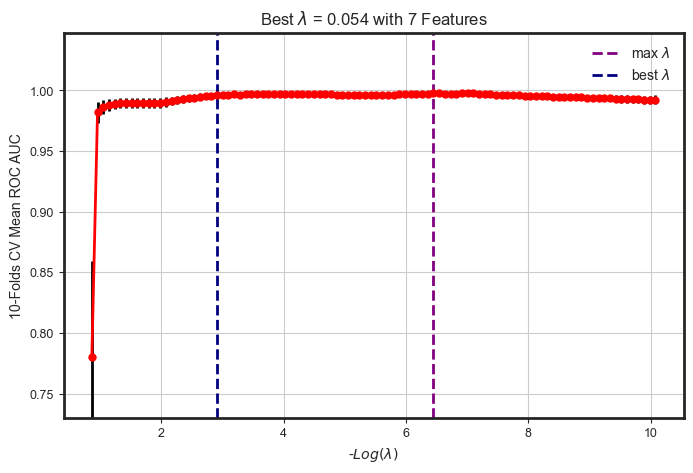

In [8]:
# plot cv_results
clf.plot_cv_results()

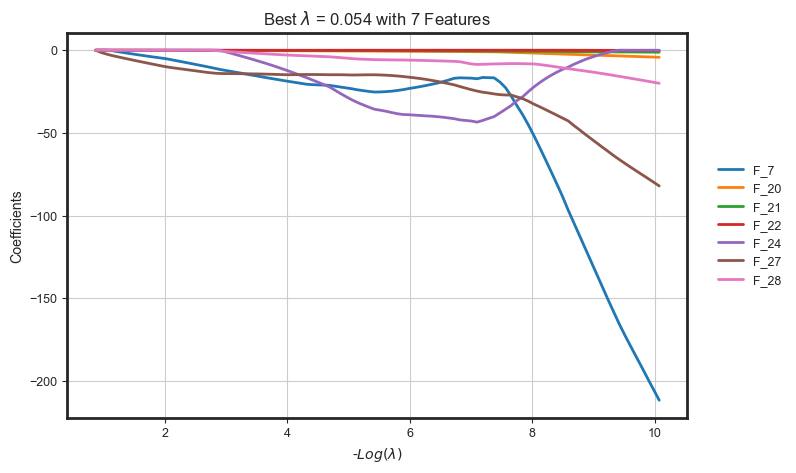

In [9]:
# plot coeff_paths
clf.plot_coeff_path()

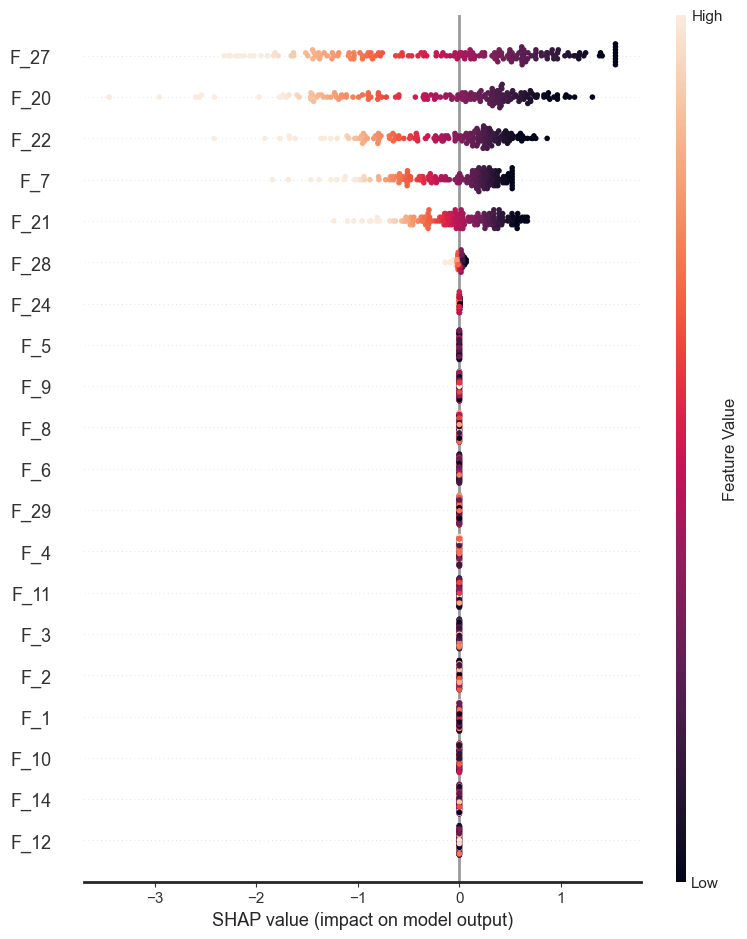

In [10]:
clf.plot_shap_summary()

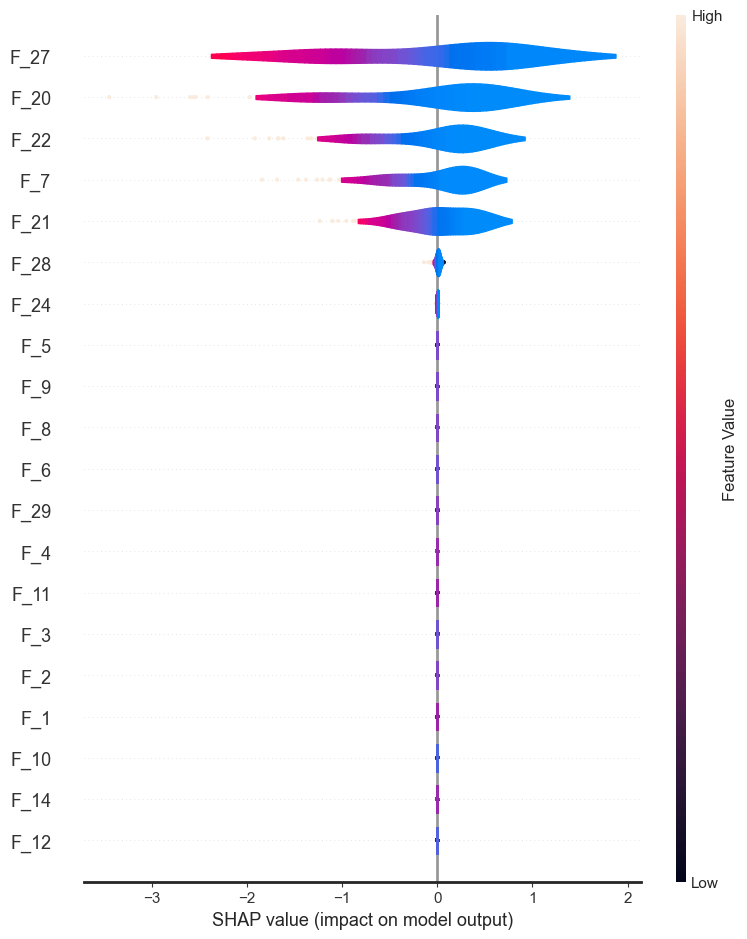

In [11]:
# shap summary plot violin on test data
clf.plot_shap_summary(plot_type="violin", validation=True)

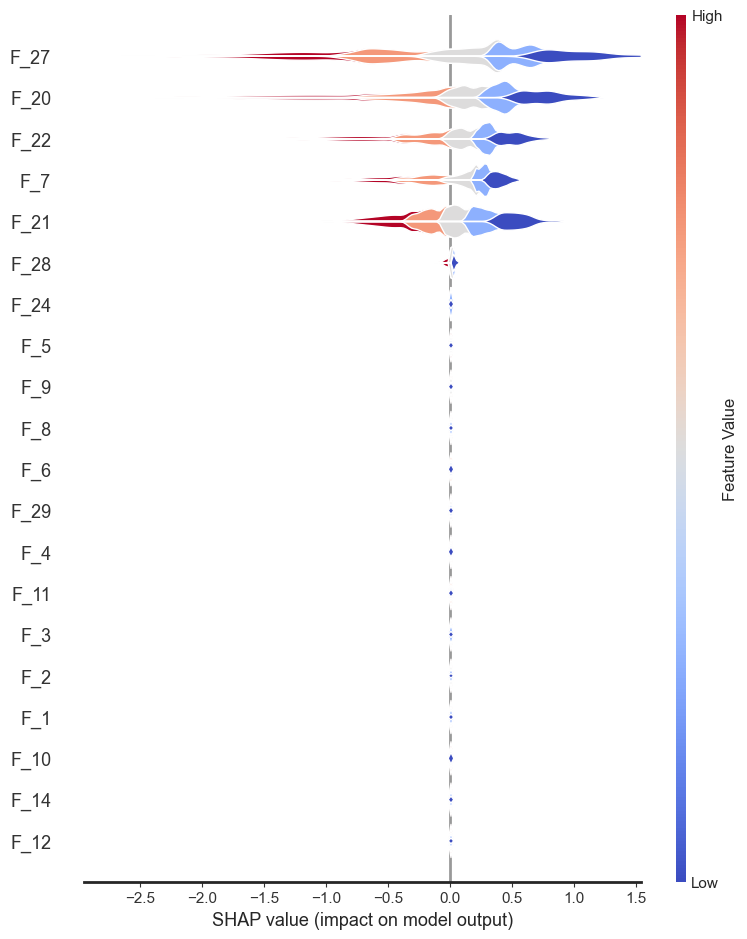

In [12]:
# shap summary plot layered violin plot on train data
clf.plot_shap_summary(
    plot_type="layered_violin",
    validation=False,
    layered_violin_max_num_bins=5,
)

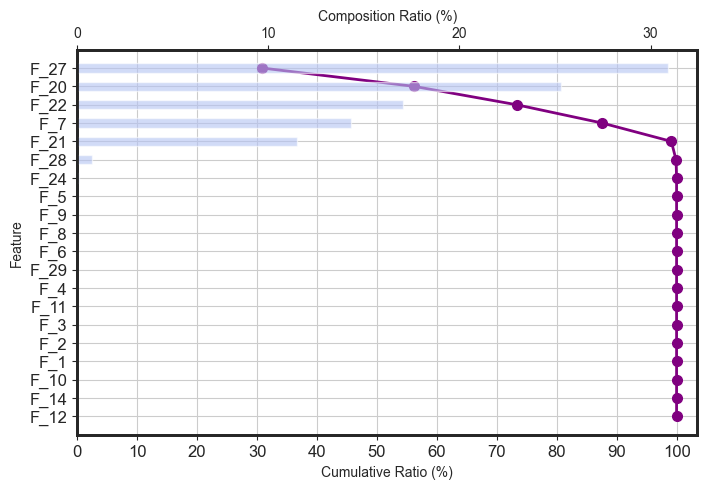

In [13]:
# shap waterfall plot
clf.plot_shap_waterfall()

In [14]:
# non-zero coeffs (or clf.get_coeffs())
clf.coeff_

,feature,coeff
0,F_22,-0.016330
1,F_21,-0.064631
2,F_24,-0.135990
3,F_20,-0.169271
4,F_28,-0.496248
5,F_7,-11.737827
6,F_27,-14.101722


In [15]:
# intercept (or clf.get_intercept())
clf.intercept_

9.20635117404446

In [16]:
# model cv_results_ (or clf.get_cv_results())
clf.cv_results_

,F_0_coeff_path,F_1_coeff_path,F_2_coeff_path,F_3_coeff_path,F_4_coeff_path,F_5_coeff_path,F_6_coeff_path,F_7_coeff_path,F_8_coeff_path,F_9_coeff_path,...,F_24_coeff_path,F_25_coeff_path,F_26_coeff_path,F_27_coeff_path,F_28_coeff_path,F_29_coeff_path,intercept_path,lambda_path,cv_standard_error,cv_mean_score
0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.524249,0.420304,0.079202,0.079202
1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,-1.381692,0.000000,0.000000,0.862885,0.382965,0.008743,0.008743
2,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,-2.422944,0.000000,0.000000,1.237263,0.348944,0.005753,0.005753
3,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-0.315315,0.0,0.000000,...,0.0,0.000000,0.0,-3.306613,0.000000,0.000000,1.584612,0.317945,0.004812,0.004812
4,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-0.911465,0.0,0.000000,...,0.0,0.000000,0.0,-4.068818,0.000000,0.000000,1.906786,0.289699,0.004205,0.004205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.334772,0.029383,0.234967,0.021789,0.0,76.256922,-116.545614,-185.683247,0.0,184.423569,...,0.0,15.421787,0.0,-73.061097,-17.578093,-246.199889,78.998438,0.000061,0.003077,0.003077
96,1.387402,0.022102,0.242357,0.022829,0.0,79.345072,-120.353588,-192.133863,0.0,190.102573,...,0.0,16.754371,0.0,-75.295509,-18.171778,-257.701337,81.385132,0.000056,0.003077,0.003077
97,1.437057,0.014867,0.249425,0.023919,0.0,82.459180,-124.122734,-198.751761,0.0,195.936331,...,0.0,18.079956,0.0,-77.525762,-18.769241,-269.157990,83.801720,0.000051,0.003346,0.003346
98,1.487831,0.007690,0.256420,0.024998,0.0,85.568578,-127.933900,-205.235488,0.0,201.596344,...,0.0,19.417550,0.0,-79.794691,-19.376586,-280.737850,86.260931,0.000046,0.003346,0.003346


In [17]:
# total model results json (or clf.get_results())
clf.results_.keys()

dict_keys(['coeff', 'coeff_path', 'cv_standard_error', 'cv_mean_score', 'lambda_path', 'lambda_best', 'lambda_max', 'n_lambda', 'intercept', 'intercept_path', 'params', 'module'])

In [18]:
# model's fitting params (or clf.get_params())
clf.params_

{'alpha': 0.9,
 'cut_point': 1.0,
 'fit_intercept': True,
 'lambda_path': None,
 'lower_limits': -inf,
 'max_features': None,
 'max_iter': 100000,
 'min_lambda_ratio': 0.0001,
 'n_jobs': -1,
 'n_lambda': 100,
 'n_splits': 10,
 'random_state': 1367,
 'scoring': 'roc_auc',
 'standardize': True,
 'tol': 1e-07,
 'upper_limits': inf,
 'verbose': False}

In [19]:
clf.model_

LogitNet(alpha=0.9, n_jobs=-1, n_splits=10, random_state=1367,
         scoring='roc_auc')

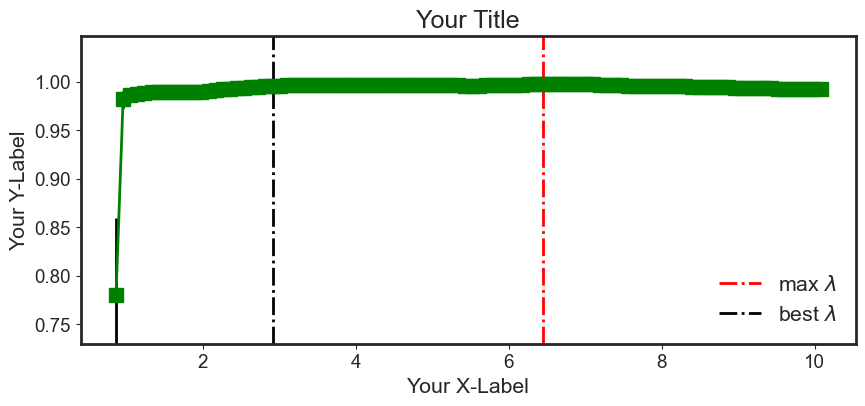

In [20]:
# plot cv_results -> try customizing it with your favorite style
clf.plot_cv_results(
    figsize=(10, 4),
    marker="s",
    markersize=10,
    color="green",
    maxlambdacolor="red",
    bestlambdacolor="black",
    linestyle="-.",
    fontsize=18,
    grid=False,
    legend=True,
    legendloc=4,
    xlabel="Your X-Label",
    ylabel="Your Y-Label",
    title="Your Title",
    save_path=None,
)

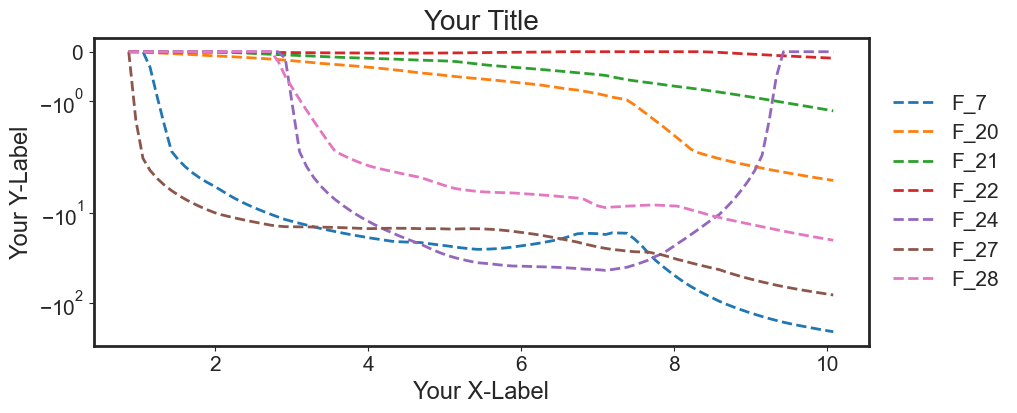

In [21]:
# plot coeff_paths --> try customizing it with your favorite style
clf.plot_coeff_path(
    figsize=(10, 4),
    linestyle="--",
    fontsize=20,
    grid=False,
    legend=True,
    legendloc="center",
    xlabel="Your X-Label",
    ylabel="Your Y-Label",
    title="Your Title",
    bbox_to_anchor=(1.1, 0.5),
    yscale="symlog",
    save_path=None,
)

## You can use the `BinaryClassificationMetrics` class to evaluate your model

In [22]:
from slickml.metrics import BinaryClassificationMetrics

metrics = BinaryClassificationMetrics(y_test, y_pred_proba)

,Accuracy,Balanced Accuracy,ROC AUC,PR AUC,Precision,Recall,Average Precision,F-1 Score,F-2 Score,F-0.50 Score,Threat Score,TP,TN,FP,FN
Threshold = 0.500 | Average = Binary,0.971000,0.961000,0.986000,0.989000,0.955000,1.000000,0.989000,0.977000,0.991000,0.964000,0.955000,107,59,5,0


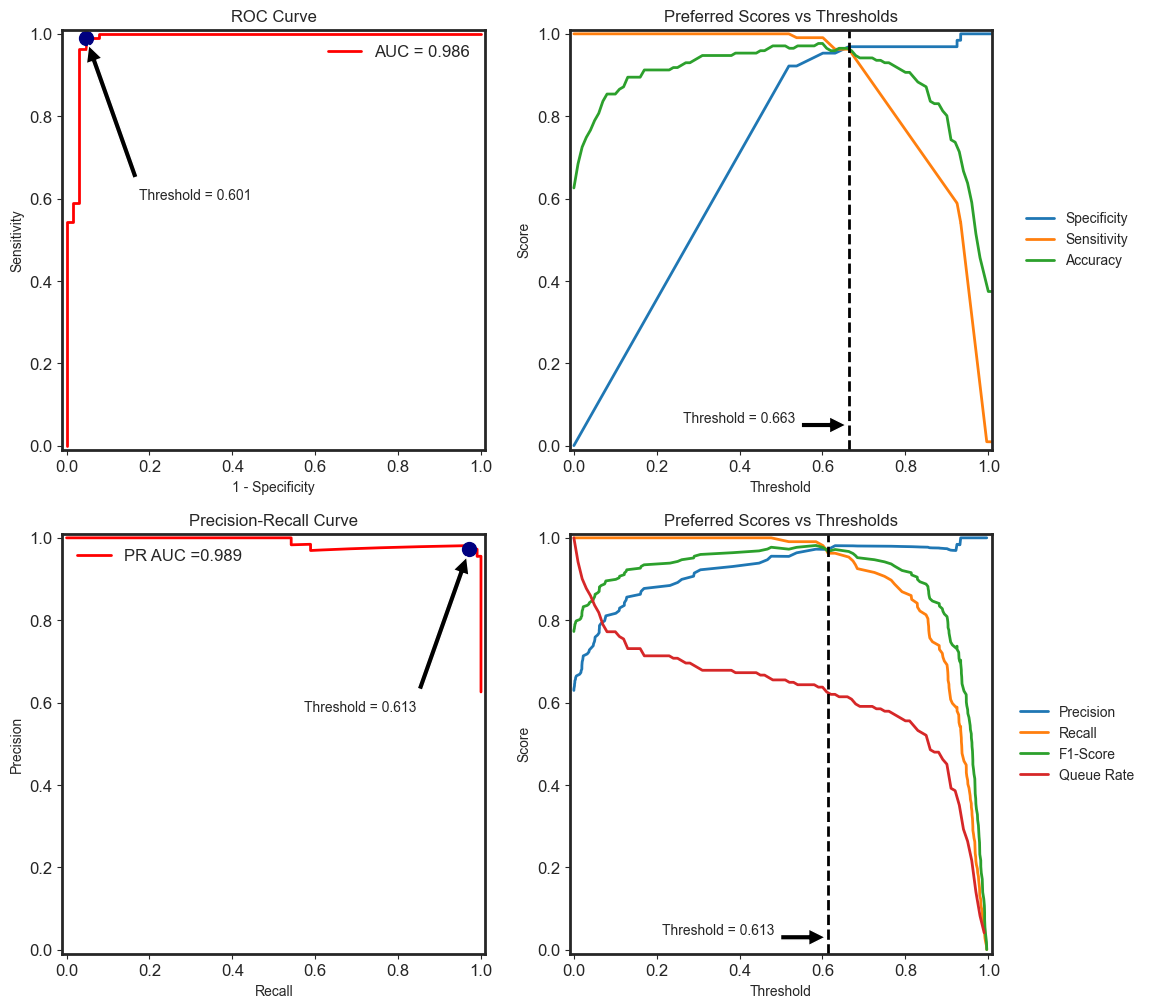

In [23]:
metrics.plot()